In [157]:
import time
import requests
import pandas as pd
import numpy as np
import threading
import matplotlib
import sklearn
import os
import sys

In [158]:
os.chdir("..")

In [159]:
import converter
import stocks

In [169]:
UMC = stocks.get_revenue('UMC')

/Users/benjaminliang/Documents/Intel-Project/stocks.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df.drop(["fiscalDateEnding"], axis=1, inplace=True)
/Users/benjaminliang/Documents/Intel-Project/stocks.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df['totalRevenue'] = pd.to_numeric(revenue_df['totalRevenue'], errors='ignore')


In [161]:
AMD = stocks.get_revenue('AMD')

/Users/benjaminliang/Documents/Intel-Project/stocks.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df.drop(["fiscalDateEnding"], axis=1, inplace=True)
/Users/benjaminliang/Documents/Intel-Project/stocks.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df['totalRevenue'] = pd.to_numeric(revenue_df['totalRevenue'], errors='ignore')


In [162]:
AAPL = stocks.get_revenue('AAPL')

/Users/benjaminliang/Documents/Intel-Project/stocks.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df.drop(["fiscalDateEnding"], axis=1, inplace=True)
/Users/benjaminliang/Documents/Intel-Project/stocks.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df['totalRevenue'] = pd.to_numeric(revenue_df['totalRevenue'], errors='ignore')


In [163]:
QCOM = stocks.get_revenue('QCOM')

/Users/benjaminliang/Documents/Intel-Project/stocks.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df.drop(["fiscalDateEnding"], axis=1, inplace=True)
/Users/benjaminliang/Documents/Intel-Project/stocks.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df['totalRevenue'] = pd.to_numeric(revenue_df['totalRevenue'], errors='ignore')


In [170]:
UMC #Someone probably converted 2017Q2 and 2018Q2 to USD

,year,quarter,reportedCurrency,totalRevenue
0,2021,4,TWD,5.909959e+10
1,2021,3,TWD,5.590668e+10
2,2021,2,TWD,5.090774e+10
3,2021,1,TWD,4.709701e+10
4,2020,4,TWD,4.529635e+10
5,2020,3,TWD,4.487045e+10
6,2020,2,TWD,4.438626e+10
7,2020,1,TWD,4.226785e+10
8,2019,4,TWD,4.184906e+10
9,2019,3,TWD,3.773844e+10


In [171]:
# Use the converter class here, I was just lazy and brought the numbers over directly
UMC.at[14, 'totalRevenue'] = float(UMC.at[14, 'totalRevenue']) * 29.623
UMC.at[18, 'totalRevenue'] = float(UMC.at[18, 'totalRevenue']) * 30.157

In [ ]:
conv = converter.Converter()
UMC.at[14, 'totalRevenue'] = conv.usd_twd(float(UMC.at[14, 'totalRevenue']), 2018, 2)
UMC.at[18, 'totalRevenue'] = conv.usd_twd(float(UMC.at[18, 'totalRevenue']), 2017, 2)

In [172]:
UMC

,year,quarter,reportedCurrency,totalRevenue
0,2021,4,TWD,5.909959e+10
1,2021,3,TWD,5.590668e+10
2,2021,2,TWD,5.090774e+10
3,2021,1,TWD,4.709701e+10
4,2020,4,TWD,4.529635e+10
5,2020,3,TWD,4.487045e+10
6,2020,2,TWD,4.438626e+10
7,2020,1,TWD,4.226785e+10
8,2019,4,TWD,4.184906e+10
9,2019,3,TWD,3.773844e+10


In [173]:
AMD

,year,quarter,reportedCurrency,totalRevenue
0,2021,4,USD,4845000000
1,2021,3,USD,4306000000
2,2021,2,USD,3840000000
3,2021,1,USD,3422000000
4,2020,4,USD,3235000000
5,2020,3,USD,2790000000
6,2020,2,USD,1918000000
7,2020,1,USD,1755000000
8,2019,4,USD,2109000000
9,2019,3,USD,1737000000


In [174]:
# Reverse the df
UMC = UMC.iloc[::-1]
AAPL = AAPL.iloc[::-1]
QCOM = QCOM.iloc[::-1]
AMD = AMD.iloc[::-1]

# Difference the data
UMC["revChange"] = pd.to_numeric(UMC.totalRevenue).diff()
UMC["pctRevChange"] = pd.to_numeric(UMC.totalRevenue).pct_change()
AAPL["revChange"] = pd.to_numeric(AAPL.totalRevenue).diff()
AAPL["pctRevChange"] = pd.to_numeric(AAPL.totalRevenue).pct_change()
QCOM["revChange"] = pd.to_numeric(QCOM.totalRevenue).diff()
QCOM["pctRevChange"] = pd.to_numeric(QCOM.totalRevenue).pct_change()
AMD["revChange"] = pd.to_numeric(AMD.totalRevenue).diff()
AMD["pctRevChange"] = pd.to_numeric(AMD.totalRevenue).pct_change()

/var/folders/wz/pp_vd4r15f15t9yc2f0gzn_c0000gn/T/ipykernel_54058/1510224374.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UMC["revChange"] = pd.to_numeric(UMC.totalRevenue).diff()
/var/folders/wz/pp_vd4r15f15t9yc2f0gzn_c0000gn/T/ipykernel_54058/1510224374.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UMC["pctRevChange"] = pd.to_numeric(UMC.totalRevenue).pct_change()
/var/folders/wz/pp_vd4r15f15t9yc2f0gzn_c0000gn/T/ipykernel_54058/1510224374.py:14: SettingWithCopyWarning: 
A value is trying to be

In [175]:
QCOM.head()

,year,quarter,reportedCurrency,totalRevenue,revChange,pctRevChange
19,2017,1,USD,5016000000,NaN,NaN
18,2017,2,USD,5356000000,340000000.0,0.067783
17,2017,3,USD,5888000000,532000000.0,0.099328
16,2017,4,USD,6035000000,147000000.0,0.024966
15,2018,1,USD,5220000000,-815000000.0,-0.135046


In [176]:
UMC.head()

,year,quarter,reportedCurrency,totalRevenue,revChange,pctRevChange
20,2016,4,TWD,3.830594e+10,NaN,NaN
19,2017,1,TWD,3.741795e+10,-8.879890e+08,-0.023181
18,2017,2,TWD,3.726235e+10,-1.555989e+08,-0.004158
17,2017,3,TWD,3.769820e+10,4.358499e+08,0.011697
16,2017,4,TWD,3.663067e+10,-1.067527e+09,-0.028318


In [177]:
AMD.head()

,year,quarter,reportedCurrency,totalRevenue,revChange,pctRevChange
19,2017,1,USD,1178000000,NaN,NaN
18,2017,2,USD,1151000000,-27000000.0,-0.022920
17,2017,3,USD,1584000000,433000000.0,0.376195
16,2017,4,USD,1449000000,-135000000.0,-0.085227
15,2018,1,USD,1615000000,166000000.0,0.114562


<AxesSubplot:>

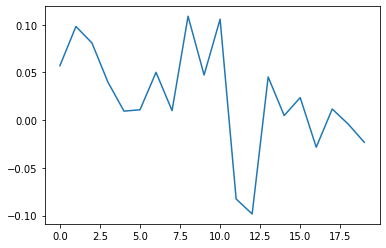

In [178]:
UMC.pctRevChange.plot()

<AxesSubplot:>

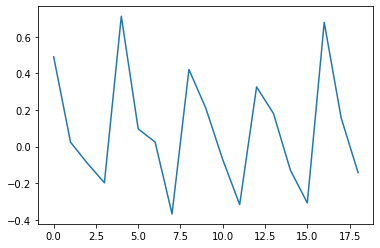

In [179]:
AAPL.pctRevChange.plot()

<AxesSubplot:>

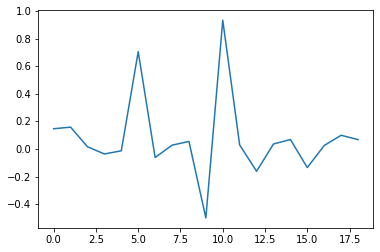

In [180]:
QCOM.pctRevChange.plot()

<AxesSubplot:>

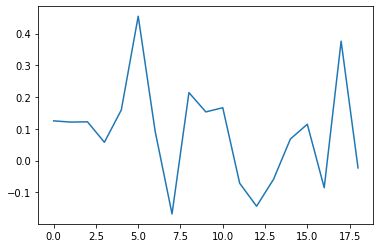

In [181]:
AMD.pctRevChange.plot()

*** Linear Regressions UMC ***

In [189]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [190]:
x_qcom = QCOM.pctRevChange[1:].to_numpy().reshape(-1,1)
y_umc = UMC.pctRevChange[2:].to_numpy()

In [191]:
model = LinearRegression()
reg = model.fit(x_qcom,y_umc)

In [192]:
r_sq = model.score(x_qcom, y_umc)
r_sq

0.07715775151619686

In [193]:
reg.predict(x_qcom)

array([ 0.02536762,  0.02699925,  0.02315295,  0.01487648,  0.02539905,
        0.02372578,  0.01348261,  0.02335713,  0.07017   , -0.00401926,
        0.02468741,  0.02327772,  0.01865859,  0.05836343,  0.02117368,
        0.0199773 ,  0.02267641,  0.03005019,  0.02944626])

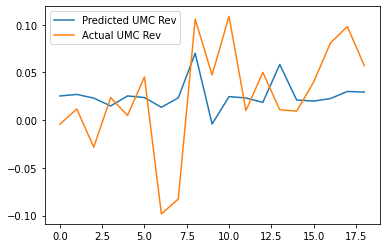

In [194]:
plt.plot(list(range(len(x_qcom))), reg.predict(x_qcom), label = 'Predicted UMC Rev')
plt.plot(list(range(len(x_qcom))), y_umc, label = 'Actual UMC Rev')
plt.legend()
plt.show()

In [195]:
x_amd = AMD.pctRevChange[1:].to_numpy().reshape(-1,1)
y_umc = UMC.pctRevChange[2:].to_numpy()

In [196]:
model_linear = LinearRegression()
reg = model_linear.fit(x_amd,y_umc)

In [197]:
r_sq = model_linear.score(x_amd, y_umc)
r_sq

0.20275378828557156

In [198]:
reg.predict(x_amd)

array([ 0.0083407 ,  0.07114563, -0.00146397,  0.02997494,  0.02266549,
        0.00264264, -0.01064345,  0.00073974,  0.03815388,  0.03608441,
        0.04564814, -0.01446585,  0.02656269,  0.08348987,  0.03704616,
        0.0210437 ,  0.03116915,  0.03104379,  0.03164491])

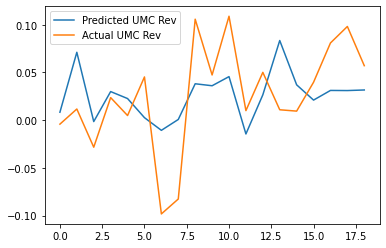

In [199]:
plt.plot(list(range(len(x_amd))), reg.predict(x_amd), label = 'Predicted UMC Rev')
plt.plot(list(range(len(x_amd))), y_umc, label = 'Actual UMC Rev')
plt.legend()
plt.show()

*** Multiple Linear Regression UMC ***

In [200]:
x_amd = AMD.pctRevChange[1:].to_numpy().reshape(-1,1)
x_amd

array([[-0.0229202 ],
       [ 0.37619461],
       [-0.08522727],
       [ 0.11456177],
       [ 0.06811146],
       [-0.05913043],
       [-0.14356131],
       [-0.07122302],
       [ 0.16653757],
       [ 0.15338645],
       [ 0.21416235],
       [-0.16785206],
       [ 0.09287749],
       [ 0.45464025],
       [ 0.15949821],
       [ 0.05780526],
       [ 0.12215079],
       [ 0.12135417],
       [ 0.12517418]])

In [201]:
x_qcom

array([[ 0.06778309],
       [ 0.09932786],
       [ 0.02496603],
       [-0.13504557],
       [ 0.0683908 ],
       [ 0.03604088],
       [-0.16199377],
       [ 0.02891367],
       [ 0.93396226],
       [-0.50036326],
       [ 0.05463232],
       [ 0.02737837],
       [-0.06192485],
       [ 0.70570202],
       [-0.01329978],
       [-0.03642987],
       [ 0.01575299],
       [ 0.15831266],
       [ 0.14663668]])

In [202]:
x_combined = np.hstack((x_qcom, x_amd))
x_combined

array([[ 0.06778309, -0.0229202 ],
       [ 0.09932786,  0.37619461],
       [ 0.02496603, -0.08522727],
       [-0.13504557,  0.11456177],
       [ 0.0683908 ,  0.06811146],
       [ 0.03604088, -0.05913043],
       [-0.16199377, -0.14356131],
       [ 0.02891367, -0.07122302],
       [ 0.93396226,  0.16653757],
       [-0.50036326,  0.15338645],
       [ 0.05463232,  0.21416235],
       [ 0.02737837, -0.16785206],
       [-0.06192485,  0.09287749],
       [ 0.70570202,  0.45464025],
       [-0.01329978,  0.15949821],
       [-0.03642987,  0.05780526],
       [ 0.01575299,  0.12215079],
       [ 0.15831266,  0.12135417],
       [ 0.14663668,  0.12517418]])

In [203]:
model_linear = LinearRegression()
reg = model_linear.fit(x_combined,y_umc)
r_sq = model_linear.score(x_combined, y_umc)
r_sq

0.21390745886112794

In [204]:
reg.predict(x_combined)

array([ 0.00994953,  0.06696201,  0.00023523,  0.02499847,  0.02281167,
        0.00415667, -0.01201434,  0.00229672,  0.05529625,  0.02263184,
        0.04313119, -0.01137541,  0.02350832,  0.091059  ,  0.03395623,
        0.01910549,  0.02930869,  0.03225831,  0.03254671])

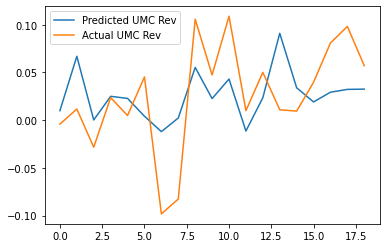

In [205]:
plt.plot(list(range(len(x_combined))), reg.predict(x_combined), label = 'Predicted UMC Rev')
plt.plot(list(range(len(x_combined))), y_umc, label = 'Actual UMC Rev')
plt.legend()
plt.show()

*** Multiple Linear Regression UMC get_revenue_list method ***

In [209]:
UMC_customers = stocks.get_revenue_list(stocks.top_customers['UMC'])

/Users/benjaminliang/Documents/Intel-Project/stocks.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df = quarter_data[["fiscalDateEnding", "reportedCurrency", "totalRevenue"]]
/Users/benjaminliang/Documents/Intel-Project/stocks.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df.drop(["fiscalDateEnding"], axis=1, inplace=True)
/Users/benjaminliang/Documents/Intel-Project/stocks.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [212]:
UMC_customers = UMC_customers.iloc[::-1]

In [214]:
UMC_customers["qcom_revChange"] = pd.to_numeric(UMC_customers.qcom_revenue).diff()
UMC_customers["qcom_pctRevChange"] = pd.to_numeric(UMC_customers.qcom_revenue).pct_change()
UMC_customers["amd_revChange"] = pd.to_numeric(UMC_customers.amd_revenue).diff()
UMC_customers["amd_pctRevChange"] = pd.to_numeric(UMC_customers.amd_revenue).pct_change()

/var/folders/wz/pp_vd4r15f15t9yc2f0gzn_c0000gn/T/ipykernel_54058/2510613649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UMC_customers["qcom_revChange"] = pd.to_numeric(UMC_customers.qcom_revenue).diff()
/var/folders/wz/pp_vd4r15f15t9yc2f0gzn_c0000gn/T/ipykernel_54058/2510613649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UMC_customers["qcom_pctRevChange"] = pd.to_numeric(UMC_customers.qcom_revenue).pct_change()
/var/folders/wz/pp_vd4r15f15t9yc2f0gzn_c0000gn/T/ipykernel_54058/2510613649.py:3:

In [215]:
UMC_customers

,year,quarter,reportedCurrency,qcom_revenue,amd_revenue,qcom_revChange,qcom_pctRevChange,amd_revChange,amd_pctRevChange
19,2017,1,USD,5016000000,1178000000,NaN,NaN,NaN,NaN
18,2017,2,USD,5356000000,1151000000,3.400000e+08,0.067783,-27000000.0,-0.022920
17,2017,3,USD,5888000000,1584000000,5.320000e+08,0.099328,433000000.0,0.376195
16,2017,4,USD,6035000000,1449000000,1.470000e+08,0.024966,-135000000.0,-0.085227
15,2018,1,USD,5220000000,1615000000,-8.150000e+08,-0.135046,166000000.0,0.114562
14,2018,2,USD,5577000000,1725000000,3.570000e+08,0.068391,110000000.0,0.068111
13,2018,3,USD,5778000000,1623000000,2.010000e+08,0.036041,-102000000.0,-0.059130
12,2018,4,USD,4842000000,1390000000,-9.360000e+08,-0.161994,-233000000.0,-0.143561
11,2019,1,USD,4982000000,1291000000,1.400000e+08,0.028914,-99000000.0,-0.071223
10,2019,2,USD,9635000000,1506000000,4.653000e+09,0.933962,215000000.0,0.166538


In [217]:
x_qcom = UMC_customers.qcom_pctRevChange[1:].to_numpy().reshape(-1,1)
x_amd = UMC_customers.amd_pctRevChange[1:].to_numpy().reshape(-1,1)
x_combined = np.hstack((x_qcom, x_amd))
x_combined

array([[ 0.06778309, -0.0229202 ],
       [ 0.09932786,  0.37619461],
       [ 0.02496603, -0.08522727],
       [-0.13504557,  0.11456177],
       [ 0.0683908 ,  0.06811146],
       [ 0.03604088, -0.05913043],
       [-0.16199377, -0.14356131],
       [ 0.02891367, -0.07122302],
       [ 0.93396226,  0.16653757],
       [-0.50036326,  0.15338645],
       [ 0.05463232,  0.21416235],
       [ 0.02737837, -0.16785206],
       [-0.06192485,  0.09287749],
       [ 0.70570202,  0.45464025],
       [-0.01329978,  0.15949821],
       [-0.03642987,  0.05780526],
       [ 0.01575299,  0.12215079],
       [ 0.15831266,  0.12135417],
       [ 0.14663668,  0.12517418]])

In [218]:
model_linear = LinearRegression()
reg = model_linear.fit(x_combined,y_umc)
r_sq = model_linear.score(x_combined, y_umc)
r_sq

0.21390745886112794

In [219]:
reg.predict(x_combined)

array([ 0.00994953,  0.06696201,  0.00023523,  0.02499847,  0.02281167,
        0.00415667, -0.01201434,  0.00229672,  0.05529625,  0.02263184,
        0.04313119, -0.01137541,  0.02350832,  0.091059  ,  0.03395623,
        0.01910549,  0.02930869,  0.03225831,  0.03254671])

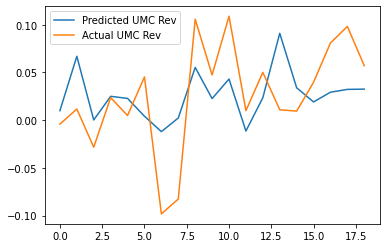

In [220]:
plt.plot(list(range(len(x_combined))), reg.predict(x_combined), label = 'Predicted UMC Rev')
plt.plot(list(range(len(x_combined))), y_umc, label = 'Actual UMC Rev')
plt.legend()
plt.show()

*** Multiple Regression TSMC ***

In [156]:
import scraper

In [153]:
TSMC = stocks.get_revenue('TSMC')

""


In [155]:
TSMC_customers = stocks.get_revenue_list('TSMC')

/Users/benjaminliang/Documents/Intel-Project/stocks.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df.drop(["fiscalDateEnding"], axis=1, inplace=True)
/Users/benjaminliang/Documents/Intel-Project/stocks.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df['totalRevenue'] = pd.to_numeric(revenue_df['totalRevenue'], errors='ignore')
/Users/benjaminliang/Documents/Intel-Project/stocks.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

*** Pearson's Correlation UMC ***

In [60]:
import scipy

In [67]:
x_amd = AMD.pctRevChange[1:].to_numpy().reshape(-1,1)
y_umc = UMC.pctRevChange[2:].to_numpy().reshape(-1,1)
x_amd = np.squeeze(np.asarray(x_amd))
y_umc = np.squeeze(np.asarray(y_umc))
print(x_amd)
print(y_umc)

[-0.0229202   0.37619461 -0.08522727  0.11456177  0.06811146 -0.05913043
 -0.14356131 -0.07122302  0.16653757  0.15338645  0.21416235 -0.16785206
  0.09287749  0.45464025  0.15949821  0.05780526  0.12215079  0.12135417
  0.12517418]
[-0.0041584   0.01169679 -0.02831772  0.02365403  0.00486232  0.0453084
 -0.09824279 -0.08261467  0.10582909  0.04738273  0.1089239   0.01000713
  0.05011878  0.01090865  0.00949175  0.03975285  0.08091233  0.09819599
  0.05711144]


In [68]:
scipy.stats.pearsonr(x_amd, y_umc)

(0.4502818986874462, 0.053041536176945125)

*** Spearman's Correlation UMC ***

In [86]:
from scipy.stats import spearmanr

In [149]:
x_amd = AMD.pctRevChange[1:].to_numpy().reshape(-1,1)
y_umc = UMC.pctRevChange[2:].to_numpy().reshape(-1,1)
print(x_amd)
print(y_umc)

[[-0.0229202 ]
 [ 0.37619461]
 [-0.08522727]
 [ 0.11456177]
 [ 0.06811146]
 [-0.05913043]
 [-0.14356131]
 [-0.07122302]
 [ 0.16653757]
 [ 0.15338645]
 [ 0.21416235]
 [-0.16785206]
 [ 0.09287749]
 [ 0.45464025]
 [ 0.15949821]
 [ 0.05780526]
 [ 0.12215079]
 [ 0.12135417]
 [ 0.12517418]]
[[ 2.90315950e+01]
 [-9.66452340e-01]
 [-2.83177173e-02]
 [ 2.36540283e-02]
 [ 2.87670364e+01]
 [-9.64712946e-01]
 [-9.82427907e-02]
 [-8.26146745e-02]
 [ 1.05829093e-01]
 [ 4.73827338e-02]
 [ 1.08923898e-01]
 [ 1.00071309e-02]
 [ 5.01187818e-02]
 [ 1.09086461e-02]
 [ 9.49174706e-03]
 [ 3.97528472e-02]
 [ 8.09123305e-02]
 [ 9.81959895e-02]
 [ 5.71114431e-02]]


In [150]:
corr, _ = spearmanr(x_amd, y_umc)
print(corr)

0.24736842105263157


*** Kendall Rank Correlation UMC ***

In [126]:
from scipy import stats

In [151]:
x_amd = AMD.pctRevChange[1:].to_numpy().reshape(-1,1)
y_umc = UMC.pctRevChange[2:].to_numpy().reshape(-1,1)
x_amd = np.squeeze(np.asarray(x_amd))
y_umc = np.squeeze(np.asarray(y_umc))
print(x_amd)
print(y_umc)

[-0.0229202   0.37619461 -0.08522727  0.11456177  0.06811146 -0.05913043
 -0.14356131 -0.07122302  0.16653757  0.15338645  0.21416235 -0.16785206
  0.09287749  0.45464025  0.15949821  0.05780526  0.12215079  0.12135417
  0.12517418]
[ 2.90315950e+01 -9.66452340e-01 -2.83177173e-02  2.36540283e-02
  2.87670364e+01 -9.64712946e-01 -9.82427907e-02 -8.26146745e-02
  1.05829093e-01  4.73827338e-02  1.08923898e-01  1.00071309e-02
  5.01187818e-02  1.09086461e-02  9.49174706e-03  3.97528472e-02
  8.09123305e-02  9.81959895e-02  5.71114431e-02]


In [141]:
tau, p_value = stats.kendalltau(x_amd, y_umc)

In [142]:
tau

0.14619883040935672

In [143]:
p_value

0.40626461663128227